In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Final - Fall Semester 2016

Guidelines:
1. Use resources available to you from class and online.
1. That being said this is an individual effort, do not work with others and cite what you do use.
1. Copying is prohibited, write your own code and solutions (you can copy from the notes).
1. Do not use piazza for the duration of the exam, it will be frozen!  
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.  In particular this means we will not debug your code.
1. Late turn in of the final will result in a 10% reduction every HOUR that it is late.  If you feel that there is a special circumstance that warrants consideration tells us BEFORE Tuesday (and more so before the exam starts).

Good luck!

## Question 1

Consider the BVP
$$
    u_{xx} = -\sin x
$$
with $u(0) = 0$ and $u(1) = 3$.

**(a)** [10] Discretize Poisson problem above using a second-order, centered difference method with $N = [32, 64, 128, 256]$ points and solve the resulting system of equations using the SOR method.  Compute the convergence to the true solution in the $\ell_2$ norm of the ODE and the $\ell_2$ norm of the difference between subsequent steps of the iteration count.  Plot both convergences vs. the iteration count on the same plot for $\omega = [1.8, \omega_{\text{opt}}, 1.9]$ where $\omega_{\text{opt}}$ is the optimal value presented in class for each of the values of $N$ (please organize your plots so they are easy to read (for instance in a properly sized $3 \times 4$ grid).  Instead of computing the expected number of iterations always take 300 instead.

**Solution**

First we will compute a true solution and then solve.

$$u_{xx} = -\sin x$$

$$u_{x} = A + \cos x$$

$$u = Ax+B+\sin x$$

$$u(0) = B = 0$$

$$u(1) = A+\sin(1) = 3 \rightarrow A = 3 - \sin(1)$$

$$u = (3-\sin(1))x+\sin x$$



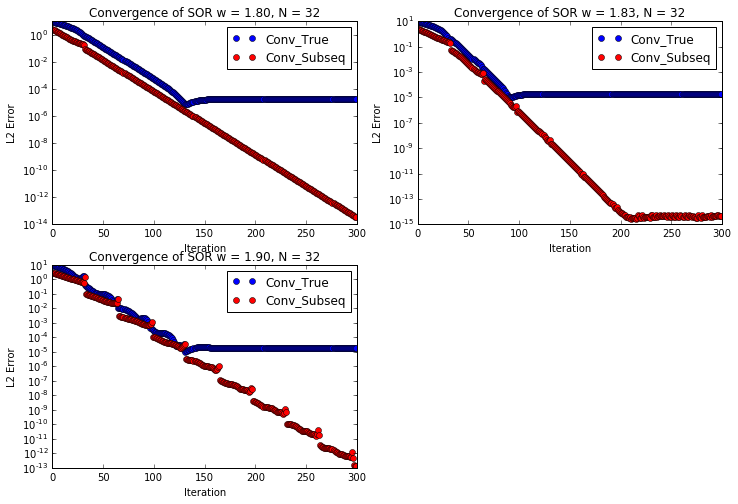

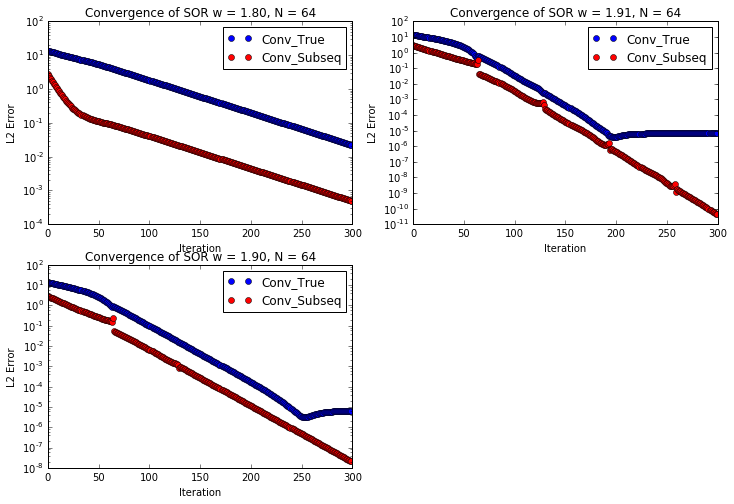

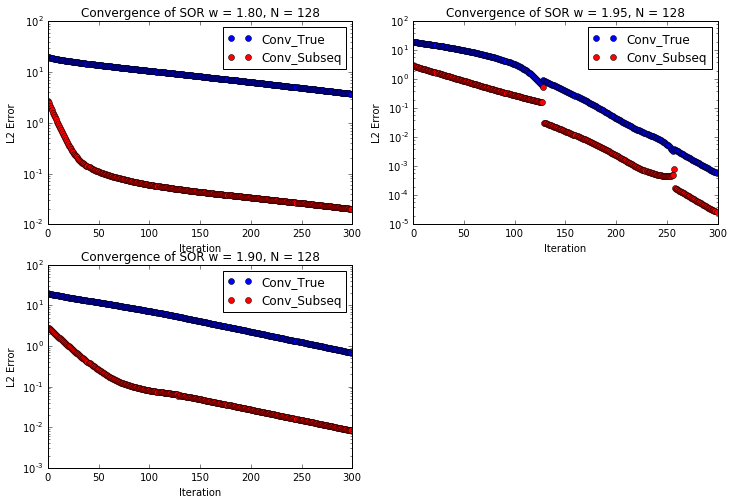

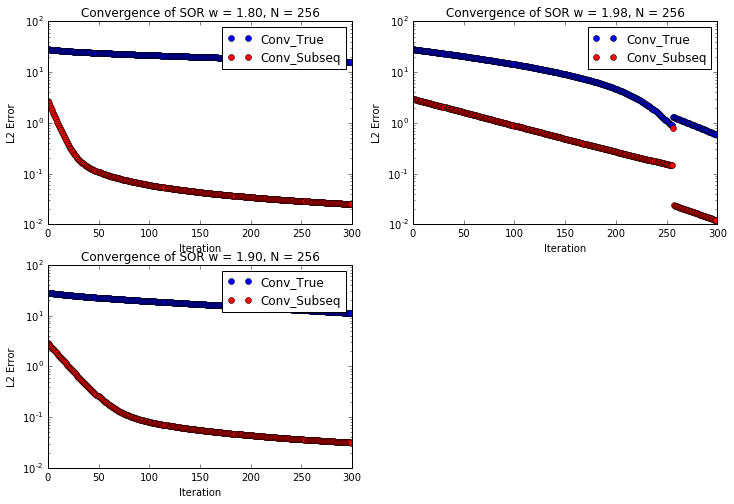

In [2]:
### INSERT CODE HERE
#Problem Setup
a = 0.
b = 1.
u_a = 0.
u_b = 3.

f = lambda x: -numpy.sin(x)
u_true = lambda x: (3.0-numpy.sin(1))*x + numpy.sin(x)

N_lst = [32,64,128,256]

# SOR parameter
iterations_SOR = 300

for N in N_lst:
    # Discretization
    x_bc = numpy.linspace(a, b, N + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (N + 1)
    omega = [1.8, 2.0 / (1.0 + numpy.sin(numpy.pi * delta_x)), 1.9]
    
    #Set up graphing
    fig = plt.figure()
    fig.set_figheight(fig.get_figheight() * 2) 
    fig.set_figwidth(fig.get_figwidth() * 2)
    
    #Want 3 graphs per N value
    for (p, w) in enumerate(omega):
        #solve the system using SOR
        U = numpy.zeros(N + 2)
        U[0] = u_a
        U[-1] = u_b
        convergence_SOR = numpy.zeros(iterations_SOR)
        convergence_subseq = numpy.zeros(iterations_SOR)
        for k in xrange(iterations_SOR):
            U_prev = U.copy()
            for i in xrange(1, N + 1):
                U_gs = 0.5 * (U[i-1] + U[i+1] - delta_x**2 * f(x_bc[i]))
                U[i] += w * (U_gs - U[i])
            convergence_SOR[k] = numpy.linalg.norm(u_true(x_bc) - U, ord=2)
            convergence_subseq[k] = numpy.linalg.norm(U_prev - U, ord=2)
        #plot both convergences
        axes = fig.add_subplot(2,2,p+1)
        axes.semilogy(range(iterations_SOR), convergence_SOR, 'bo', label="Conv_True")
        axes.semilogy(range(iterations_SOR), convergence_subseq, 'ro', label="Conv_Subseq")
        #print convergence_subseq
        axes.set_title("Convergence of SOR w = %.2f, N = %i" %(w, N))
        axes.set_xlabel("Iteration")
        axes.set_ylabel("L2 Error")
        plt.legend()
plt.show()

**(b)** [5] Describe what you observe from part (a).  Please comment on the following
1. Comment on the convergence rates, how steady are they (are the slopes constant).
2. Compare the optimal value of $\omega$ vs. the others.
3. Why do you suppose those kinks in some of the convergence rates are happening?
4. Describe and explain the different behavior between the convergences we plotted in each plot.
5. For the $N = 32$ case why does the error convergence stall?

**Comments**

#### 1 Convergence Rates:

When N is small, we see that the converge rates seem to stall. While the convergence of the subsequent iterations for the most part is steady, the convergence to the true solution becomes gradually steadier as N increases. 

#### 2 Optimal Omega

In all cases, it seems the optimal omega performs just as well or better than the others which makes sense. For example, in most cases except N=32, the $\omega_{opt}$ graph depicts what the other two graphs will eventually go to, stalling or converging down. 

#### 3 Kinks

The kinks in the graph are definietly curious. Perhaps these kinks arise due to the fact that the matrix may be ill-conditioned. Therefore, slightest perturbations will have a large effect on the matrix and its eigenvalues which in turn affect the spectral radius and our convergence condition. Another more probable reason is due to floating point error as our inner loop multiplying by omega and continuously summing up the previous value.

#### 4 Different behaviors of converges plots

We plotted two convergences, the true solution and each subsequant iteration. For all the graphs, each subsequant iteration gets a smaller error meaning that we are converging. This behavior is good, meaning that our method is woring. However, although the subsequent iterations are converging, sometimes we are not converging (not even slowly) to the true solution meaning that something went wrong - likely dealing with an ill-conditioned matrix or floating point error. 

#### 5 Why does the convergence stall

As mentioned before, the convergence should not stall as we know that for 0 < w < 2, the SOR method should converge. Thus, the stall shouldnt have to do with the method but rather our machines. Thus, stall probably occurs due to floating point error. Since N is relatively small compared to our other numbers, delta_x is large. Thus, we are squaring delta x and bunch of times and adding/subtracting it with other parts of matrices whic may lead to the convergence stalling. 



**(c)** [5] Let be the spectral radius of the iteration matrix $G$ for a given value of $\omega$.  Write a function that computes $g(\omega) = \rho(G(\omega))$, the spectral radius of the iteration matrix $G$ for a given value of $\omega$ and $N$.

In [3]:
def g(omega, N):
    ### INSERT CODE HERE
    # Construct matrix A
    A = numpy.zeros((N, N))
    delta_x = (omega - 2.0) / -2.0*numpy.pi
    diagonal = numpy.ones(N) / delta_x**2
    A += numpy.diag(diagonal * -2.0, 0)
    A += numpy.diag(diagonal[:-1], 1)
    A += numpy.diag(diagonal[:-1], -1)
    
    #Split A into L, D, U
    L = numpy.tril(A, -1)
    D = numpy.diag(numpy.diag(A))
    U = numpy.triu(A,1)
    
    #Calculate M and N
    M = D + omega*L
    N = (1.0-omega)*D - omega*U
    
    G = numpy.dot(numpy.linalg.inv(M), N)
    spec_radius = numpy.max(numpy.abs(numpy.linalg.eigvals(G)))
    return spec_radius

In [4]:
numpy.testing.assert_allclose(0.975847650302, g(2.0 / (1.0 + numpy.sin(numpy.pi * delta_x)), 100), atol=1e-8)
print "Success!"

Success!


**(d)** [5] Plot the function $g(\omega)$ for $N = [8, 16, 32, 64, 128]$ for $\omega \in [0, 3.5]$ (you may not be able to go all the way to 0).  Also find the optimal $\omega$ using an appropriate numerical method from class to within $10^{-8}$ of the **known optimal value** and plot the minimum on your plots.  Also plot lines on your figures representing the values of $g(\omega)$ that will diverge and our theoretical range of valid $\omega$s.

Success for N = 8!
  w = 1.49029060383
  g(w) = 0.490290603831
omega optimal is: 1.49
Success for N = 16!
  w = 1.6895466309
  g(w) = 0.689546630897
omega optimal is: 1.69
Success for N = 32!
  w = 1.82639054332
  g(w) = 0.826390543324
omega optimal is: 1.83
Success for N = 64!
  w = 1.90782645558
  g(w) = 0.907838011697
omega optimal is: 1.91
Success for N = 128!
  w = 1.95245569783
  g(w) = 0.952479442967
omega optimal is: 1.95


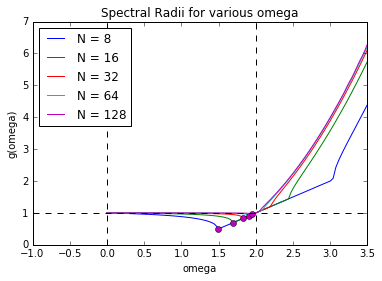

In [5]:
### INSERT CODE HERE
N_lst = [8,16,32,64,128]
omega_lst = numpy.linspace(0.0, 3.5, 100)
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

phi = (numpy.sqrt(5.0) - 1.0) / 2.0
TOLERANCE = 1e-8
MAX_STEPS = 1000

for N in N_lst:
    g_omega = numpy.zeros(omega_lst.shape)
    delta_x = 1.0 / (N+1)
    omega_opt = 2.0 / (1.0 + numpy.sin(numpy.pi * delta_x))
    for (i,omega) in enumerate(omega_lst):
        g_omega[i] = g(omega, N)
    axes.plot(omega_lst, g_omega, label="N = %i" %N)
    #Perform Golden Section search
    x = [0.0, None, None, 3.5]
    x[1] = x[3] - phi * (x[3] - x[0])
    x[2] = x[0] + phi * (x[3] - x[0])
    success = False
    for n in xrange(1, MAX_STEPS + 1):
        g_1 = g(x[1], N)
        g_2 = g(x[2], N)

        if g_1 < g_2:
            x[3] = x[2]
            x[2] = x[1]
            x[1] = x[3] - phi * (x[3] - x[0])
        else:
            x[0] = x[1]
            x[1] = x[2]
            x[2] = x[0] + phi * (x[3] - x[0])

        if numpy.abs(((x[3] + x[0]) / 2.0) - omega_opt) < TOLERANCE:
            success = True
            break

    if success:
        print "Success for N = %i!" %N
        print "  w = %s" % str((x[3] + x[0]) / 2.0)
        print "  g(w) = %s" % g((x[3] + x[0]) / 2.0, N)
        #print "  number of steps = %s" % n
        print "omega optimal is: %.2f" %omega_opt
        axes.plot((x[3] + x[0]) / 2.0, g((x[3] + x[0]) / 2.0, N), 'mo')
    else:
        print "Reached maximum number of steps!"

    
axes.axvline(x=2.0, color='k', linestyle='dashed')
axes.axvline(x=0.0, color='k', linestyle='dashed')
axes.axhline(y=1.0, color='k', linestyle='dashed')
plt.legend(loc=2)
axes.set_title("Spectral Radii for various omega")
axes.set_xlabel("omega")
axes.set_ylabel("g(omega)")
axes.set_xlim(-1.0,3.5)
plt.show()

**(e)** [5] Comment on what you observe and interpret the changes in the function $g(\omega)$, especially for $\omega > 2$.

**Comments**

As per the graph above, we see that values greater than 2 for omega will not be guaranteed to converge. We found the optimal omega using golden search and see that at as omega goes above two, the function g is no longer bounded by our line, g = 1. Therefore, our theoretical valid omegas range from [0,2] and since we are doing SOR, these values should really fall between 1 and 2. Moreover, for all spectral radii above one, our method will diverge which we see as g shoots up when omega goes greater than 2.

## Question 2

Consider the third order initial value problem
$$
    \begin{split}
    &v'''(t) + v''(t) + 4v'(t) + 4v(t) = 4t^2 + 8t - 10,\\
    &v(0) = -3,\quad v'(0) = -2,\quad v''(0) = 2.
    \end{split}
$$

**(a)** [5] Verify that the function
$$
v(t) = -\sin(2t) + t^2 - 3
$$
is a solution to this problem.  How do you know it is the unique solution?

**Solution**

Let compute the derivatives of v:

$$v'(t) = -2 \cos{2t} + 2t$$

$$v''(t) = 4 \sin{2t} + 2$$

$$v'''(t) = 8 \cos{2t}$$

Plugging into our equation gets us:

$$8 \cos{2t} + 4 \sin{2t} + 2 + 4(-2 \cos{2t} + 2t) + 4(-\sin(2t) + t^2 - 3) = 4t^2 + 8t - 10$$

$$8 \cos{2t} + 4 \sin{2t} + 2 -8 \cos{2t} + 8t - 4\sin(2t) + 4t^2 - 12 = 4t^2 + 8t - 10$$

$$4t^2 + 8t - 10 = 4t^2 + 8t - 10 \> \checkmark$$

How do we know that this solution is unique? 

If we look at the given problem, we can see that the function will be Lipshitz continuous near v = 0. The derivatives converge to a constant in the limit that v goes to 0 meaning that there must be a unique solution. 

Since we verified the above solution and there exists a unique solution, the solution we found above is the only solution.

**(b)** [5] Rewrite this problem as a first order system of the form $u'(t) =
f(u(t), t)$ where $u(t) \in \mathbb{R}^3$.  Make sure you also specify the
initial condition $u(0) = \eta$ as a 3-vector.

**Solution**

$$\vec{u} = \begin{bmatrix} v \\ v' \\ v'' \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \end{bmatrix}$$

$$\frac{\text{d} \vec{u}}{\text{d}t} = A \vec{u}$$

$$\frac{\text{d}}{\text{d}t} \begin{bmatrix} u_1 \\ u_2 \\ u_3  \end{bmatrix} = \begin{bmatrix} u_2 \\ u_3 \\ 4t^2 + 8t - 10 - u_3 - 4u_2 - 4u_1 \end{bmatrix} = \vec{f}(u(t), \vec{u})$$

In matrix form this would look like:

$$
    \frac{\text{d}}{\text{d}t} \begin{bmatrix} u_1 \\ u_2 \\ u_3  \end{bmatrix} = 
    \begin{bmatrix}
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        -4 & -4 & 1
        \end{bmatrix}
    \begin{bmatrix}
        u_1 \\
        u_2 \\
        u_3 
        \end{bmatrix}
    = \begin{bmatrix}
        u_2 \\
        u_3 \\
        4t^2 + 8t - 10 
        \end{bmatrix}
$$

where the initial vector is:

$$
    \begin{bmatrix}
        u_{1_0} \\
        u_{2_0} \\
        u_{3_0}
        \end{bmatrix} = 
    \begin{bmatrix}
        -3 \\
        -2 \\
        2 
        \end{bmatrix}
$$

**(c)** [7] Write a function `solve_AB4` that solves the ODE using a 4-step Adams-Bashforth method over the time interval $0\leq t \leq 10$.  Make sure to use an appropriate method to startup the method.  The function should take as arguments the number of time points $N$ (which includes the initial time and final time) and the initial condition $\eta$.  Return the vector of time points $t$ and the solution $U$.

In [6]:
def solve_AB4(N, eta):
    ### INSERT CODE HERE
    f = lambda t, u: numpy.array([u[1], u[2], 4.0*(t**2) + 8.0*t - 10.0 - u[2] - 4.0*u[1] - 4.0*u[0]])
    
    t = numpy.linspace(0.0, 10.0, N)
    delta_t = t[1] - t[0]
    u_ab4 = numpy.zeros((3,N))
    u_ab4[:, 0] = numpy.array(eta)
    
    #Using RK_4 to startup
    for (n, t_n) in enumerate(t[1:4]):
        #u_ab4[:, n+1] = u_ab4[:, n] + .5*delta_t*f(t[n], u_ab4[:, n])
        #u_ab4[:, n+1] = u_ab4[:, n] + delta_t*f(t[n], u_ab4[:, n+1])
        y_1 = u_ab4[:, n]
        y_2 = u_ab4[:, n] + 0.5 * delta_t * f(t[n] + 0.5 * delta_t, y_1)
        y_3 = u_ab4[:, n] + 0.5 * delta_t * f(t[n] + 0.5 * delta_t, y_2)
        y_4 = u_ab4[:, n] + delta_t * f(t[n] + 0.5 * delta_t, y_3)
        u_ab4[:, n+1] = u_ab4[:, n] + delta_t / 6.0 * (f(t[n], y_1) + 2.0 * f(t[n] + 0.5 * delta_t, y_2) + 2.0 * f(t[n] + 0.5 * delta_t, y_3) + f(t[n] + delta_t, y_4))
    
    #4-step Adams Bashforth
    for n in xrange(0, len(t)-4):
        u_ab4[:, n+4] = u_ab4[:, n+3] + delta_t / 24.0 *(-9.0*f(t[n], u_ab4[:, n]) + 37.0*f(t[n+1], u_ab4[:, n+1]) 
                                                 -59.0*f(t[n+2], u_ab4[:, n+2])+55.0*f(t[n+3], u_ab4[:, n+3]))
    return t, u_ab4

In [7]:
t, U = solve_AB4(200, [-3.0, -2.0, 2.0])
print "Largest error = %s " % numpy.linalg.norm(-numpy.sin(2.0 * t) + t**2 - 3.0 - U[0, :], ord=numpy.infty)
numpy.testing.assert_allclose(U[0, :], -numpy.sin(2.0 * t) + t**2 - 3.0, rtol=1e-8, atol=1e-3)
print "Success!"

Largest error = 0.000732841174667 
Success!


**(d)** [7] Implement a function similar to part (c) but use a 3-step Adams-Bashforth-Moulton predictor/corrector method (3 step methods for both the predictor and corrector).

In [8]:
def solve_ABM3(N, eta):
    ### INSERT CODE HERE
    f = lambda t, u: numpy.array([u[1], u[2], 4.0*t**2 + 8.0*t - 10.0 - u[2] - 4.0*u[1] - 4.0*u[0]])
    
    t = numpy.linspace(0.0, 10.0, N)
    delta_t = t[1] - t[0]
    u_abam = numpy.zeros((3,N))
    u_abam[:, 0] = numpy.array(eta)
    
    #RK_4 Method
    for (n, t_n) in enumerate(t[1:3]):
        #u_abam[:, n+1] = u_abam[:, n] + 0.5 * delta_t * f(t[n], u_abam[:, n])
        #u_abam[:, n+1] = u_abam[:, n] + delta_t * f(t[n], u_abam[:, n+1])
        y_1 = u_abam[:, n]
        y_2 = u_abam[:, n] + 0.5 * delta_t * f(t[n] + 0.5 * delta_t, y_1)
        y_3 = u_abam[:, n] + 0.5 * delta_t * f(t[n] + 0.5 * delta_t, y_2)
        y_4 = u_abam[:, n] + delta_t * f(t[n] + 0.5 * delta_t, y_3)
        u_abam[:, n+1] = u_abam[:, n] + delta_t / 6.0 * (f(t[n], y_1) + 2.0 * f(t[n] + 0.5 * delta_t, y_2) + 2.0 * f(t[n] + 0.5 * delta_t, y_3) + f(t[n] + delta_t, y_4))
    
    #3-step Adams-Bashforth and Adams Moulton P/C Method
    for n in xrange(0, len(t) - 3):
        #3 step Adams Bashforth
        u_abam[:, n+3] = u_abam[:, n + 2] + delta_t / 12.0 * (5.0*f(t[n], u_abam[:, n]) - 
                    16.0 * f(t[n+1], u_abam[:, n+1]) + 23.0 * f(t[n+2], u_abam[:, n+2]))
        #3 step Adams Moulton
        u_abam[:, n+3] = u_abam[:, n + 2] + delta_t / 24.0 * (f(t[n], u_abam[:, n]) - 
                    5.0 * f(t[n+1], u_abam[:, n+1]) + 19.0 * f(t[n+2], u_abam[:, n+2]) + 9.0*f(t[n+3], u_abam[:, n+3]))
    return t, u_abam

#t, U = solve_ABM3(200, [-3.0, -2.0, 2.0])
#fig = plt.figure()
#axes = fig.add_subplot(1,1,1)
#axes.plot(t, -numpy.sin(2.0 * t) + t**2 - 3.0, 'r')
#axes.plot(t, U[0, :], 'b')
#axes.plot(t, -numpy.sin(2.0 * t) + t**2 - 3.0 - U[0, :], 'm')
#axes.set_title("Testing Error")
#axes.set_ylabel('y')
#axes.set_xlabel('x')
#plt.show()

In [9]:
t, U = solve_ABM3(600, [-3.0, -2.0, 2.0])
print "Largest error = %s " % numpy.linalg.norm(-numpy.sin(2.0 * t) + t**2 - 3.0 - U[0, :], ord=numpy.infty)
numpy.testing.assert_allclose(U[0, :], -numpy.sin(2.0 * t) + t**2 - 3.0, rtol=1e-8, atol=1e-3)
print "Success!"

Largest error = 4.75829104118e-06 
Success!


**(e)** [6] Plot the convergence for each of your implemented methods and comment on their convergence rates.

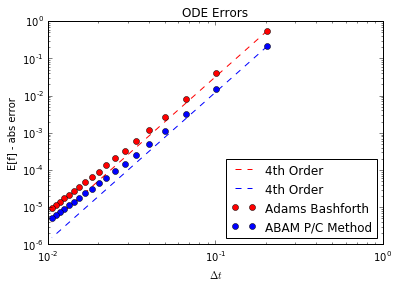

In [10]:
### INSERT CODE HERE
num_partitions = range(50,1000,50)
delta_t = numpy.empty(len(num_partitions))
error_ab4 = numpy.empty(len(num_partitions))
error_abam = numpy.empty(len(num_partitions))

f = lambda t: -numpy.sin(2.0 * t) + t**2 - 3.0

eta = [-3., -2., 2.]

for (j, N) in enumerate(num_partitions):
    t_hat = numpy.linspace(0.0, 10.0, N)
    delta_t[j] = t_hat[1] - t_hat[0]
    
    error_ab4[j] = numpy.linalg.norm(delta_t[j]*(f(t_hat) - solve_AB4(N, eta)[1][0,:]), ord=1)
    error_abam[j] = numpy.linalg.norm(delta_t[j]*(f(t_hat) - solve_ABM3(N, eta)[1][0,:]), ord=1)    

fig = plt.figure()
axes = fig.add_subplot(1,1,1)

order_C = lambda delta_t, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_t))
axes.loglog(delta_t, order_C(delta_t[0], error_ab4[0], 4.) * delta_t**4., 'r--', label="4th Order")
axes.loglog(delta_t, order_C(delta_t[0], error_abam[0], 4) * delta_t**4, 'b--', label="4th Order")
axes.loglog(delta_t, error_ab4, 'ro', label="Adams Bashforth")
axes.loglog(delta_t, error_abam, 'bo', label="ABAM P/C Method")

axes.set_xlabel("$\Delta t$")
axes.set_ylabel("E[f] - abs error")
axes.set_title("ODE Errors")
axes.legend(loc=4)

plt.show()   

**Comments**

As expected, when we did the taylor series expansions, we saw that Adams Bashforth with 4 steps will be fourth ourder accurate. Meanwhile, our 3-step Adams Bashforth/Adams Moulton Predictor/Corrector method is 4th order accurate which follows from class notes where the one-step P/C method was second order accurate. If we used, RK2 to startup these methods, we would have had second order accurate graphs which is why we needed to use RK4.

It is worth noting that the P/C method converges slightly faster and this precictor/corrector relationship is a way to gain an order of magnitude while not having to increase our step. 


## Question 3

Determine the coefficients $\beta_0,~\beta_1,~\beta_2$ for the third
order, 2-step Adams-Moulton method.  We will do this two different ways:

**(a)** [10] Using the general expression for the local truncation error for multi-step methods
$$
    \tau^{n + r} = \frac{1}{\Delta t} \left (\sum^r_{j=0} \alpha_j u(t_{n+j}) - \Delta t \sum^r_{j=0} \beta_j f(u(t_{n+j})) \right ).
$$
Note that $\alpha_0 = 0$, $\alpha_1 = -1$, and $\alpha_2 = 1$.

**Solution**

We know that the general form of an Adams method is:

$$
    U_{n+r} = U_{n+r-1} + \Delta t \sum^r_{j=0} \beta_j f(U_{n+j}).
$$

For a 2-step Adams Moulton method, this will be:

$$
    u(t_{n+2}) = u(t_{n+1}) + \Delta t [\beta_0f(t_n,u_n) +\beta_1f(t_{n+1},u_{n+1}) +\beta_2f(t_{n+2},u_{n+2}]
$$

Through the method of trucation errors, we want to exapand out some taylor series and choose coefficients such that we eliminate as many terms as we can. 

Note: $u'(t_n) = f(t_n, u_n)$

Taylor Series expansions around $t_n$ we will consider:

$$\begin{aligned}
    u(t_{n+j}) &= u(t_n) + j \Delta t u'(t_n) + \frac{1}{2} (j \Delta t)^2 u''(t_n) + \frac{1}{6} (j \Delta t)^3 u''(t_n) + \mathcal{O}(\Delta t^4) \\
    u'(t_{n+j}) &= u'(t_n) + j \Delta t u''(t_n) + \frac{1}{2} (j \Delta t)^2 u'''(t_n) + \mathcal{O}(\Delta t^3)
\end{aligned}$$

Plugging into our general equation:

$$
    u(t_n) + 2 \Delta t u'(t_n) + \frac{1}{2} (2 \Delta t)^2 u''(t_n) + \frac{1}{6} (2 \Delta t)^3 u''(t_n) + \mathcal{O}(\Delta t^4) = u(t_n) + \Delta t u'(t_n) + \frac{1}{2} (\Delta t)^2 u''(t_n) + \frac{1}{6} (\Delta t)^3 u''(t_n) + \mathcal{O}(\Delta t^4) + \Delta t [\beta_0u'(t_n) + \beta_1[u'(t_n) + \Delta t u''(t_n) + \frac{1}{2} (\Delta t)^2 u'''(t_n) + \mathcal{O}(\Delta t^3)]+\beta_2[u'(t_n) + 2 \Delta t u''(t_n) + \frac{1}{2} (2 \Delta t)^2 u'''(t_n) + \mathcal{O}(\Delta t^3)]]
$$

Simplifying this yields:

$$
    \Delta t u'(t_n) + \frac{3}{2} \Delta t^2 u''(t_n) + \frac{7}{6} (\Delta t)^3 u''(t_n) =  \Delta t u'(t_n)(\beta_0 + \beta_1 + \beta_2) + \Delta t^2 u''(t_n)(\beta_1 + 2\beta_2) + (\Delta t)^3 u'''(t_n)(\frac{1}{2}\beta_1 + 2\beta_2)
$$

Thus, we have the following equations:

$$
    \beta_0 + \beta_1 + \beta_2 = 1 \\
    \beta_1 + 2\beta_2 = \frac{3}{2} \\
    \frac{1}{2}\beta_1 + 2\beta_2 = \frac{7}{6}
$$
    
Solving the above:

$$
    Ax = b \rightarrow
    \begin{bmatrix}
        1 & 1 & 1 \\
        0 & 1 & 2 \\
        0 & \frac{1}{2} & 2 \\
    \end{bmatrix}
    \begin{bmatrix}
        \beta_0 \\
        \beta_1 \\
        \beta_2
     \end{bmatrix} = 
     \begin{bmatrix}
        1 \\
        \frac{3}{2} \\
        \frac{7}{6}
     \end{bmatrix}
$$

Therefore:

$$\beta_0 = -\frac{1}{12}, \beta_1 = \frac{8}{12}, \beta_2 = \frac{5}{12} $$

**(b)** [10] Using the relation
$$
    u(t_{n+2}) = u(t_{n+1}) + \int_{t_{n+1}}^{t_{n+2}}\,f(u(s))\,ds.
$$
Interpolate  a quadratic polynomial $p(t)$ through the three values $f(U^n),~f(U^{n+1})$ and $f(U^{n+2})$ and then integrate this polynomial exactly to obtain the formula.  The coefficients of the polynomial will depend on the three values $f(U^{n+j})$.   It's easiest to use the "Newton form" of the interpolating polynomial and consider the three
times $t_n=-\Delta t$, $t_{n+1}=0$, and $t_{n+2}=\Delta t$ so that $p(t)$ has the form
$$
    p(t) = A + B(t+\Delta t) + C(t+\Delta t)t
$$
where $A,~B$, and $C$ are the appropriate divided differences based on the data.  Then integrate from $0$ to $\Delta t$.   (The method has the same coefficients at any time, so this is valid.)

**Solution**

As per the hint we will interpolate the function $f(u(s))$ with the netown form polynomial:

$$
    p(t) = A + B(t+\Delta t) + C(t+\Delta t)t
$$

Since A, B, C are the divided difference, we get:

$$A = [f(t_n, u_n)] = u'_n$$

$$B = [f(t_n, u_n),f(t_{n+1}, u_{n+1})] = \frac{u'_{n+1} - u'_n}{t_{n+1} - t_n} = \frac{u'_{n+1} - u'_n}{\Delta t}$$

$$C = [f(t_n, u_n),f(t_{n+1}, u_{n+1}), f(t_{n+2}, u_{n+2})] = \frac{u'_{n+2} - u'_{n+1}}{(t_{n+2} - t_{n+1})(t_{n+2} - t_n)} - \frac{u'_{n+1} - u'_n}{(t_{n+1} - t_n)(t_{n+2} - t_n)} = \frac{u'_{n+2}-2u'_{n+1}+u'_n}{2\Delta t^2}$$

Let us integrate our interpolating polynomial from 0 to &\Delta t&:

$$
    \int_0^{\Delta t} p(t) dt = A\Delta t + \frac{B\Delta t^2}{2} + B \Delta t^2 + \frac{C \Delta t^3}{3} + \frac{C\Delta t^3}{2} \\ 
    = \Delta t (A + \frac{3}{2} B \Delta t + \frac{5}{6}C \Delta t^2)
$$

Plugging in above values for A, B, C:

$$
    = \Delta t (u'_n + \frac{3}{2} \frac{u'_{n+1} - u'_n}{\Delta t} \Delta t + \frac{5}{6} \frac{u'_{n+2}-2u'_{n+1}+u'_n}{2\Delta t^2} \Delta t^2) \\ 
    = \Delta t (u'_n + \frac{3}{2} (u'_{n+1} - u'_n) + \frac{5}{12} (u'_{n+2}-2u'_{n+1}+u'_n)) 
$$

This value now should fit with the general Adams form above s.t:

$$
    \Delta t (u'_n + \frac{3}{2} (u'_{n+1} + u'_n) + \frac{5}{12} (u'_{n+2}-2u'_{n+1}-u'_n)) = \Delta t (\beta_0 u'_n + \beta_1 u'_{n+1} + \beta_2 u'_{n+2}) \\ 
    (u'_n(1 - \frac{3}{2} + \frac{5}{12}) + u'_{n+1}(\frac{3}{2} - \frac{10}{12}) + \frac{5}{12} u'_{n+2}) = \beta_0 u'_n + \beta_1 u'_{n+1} + \beta_2 u'_{n+2}
$$

Thus:

$$\beta_0 = \frac{12-18+5}{12} = -\frac{1}{12}$$

$$\beta_1 = \frac{18-10}{12} = \frac{8}{12}$$

$$\beta_2 = \frac{5}{12}$$

## Question 4

A simplification of Gaussian elimination and $LU$ factorization, known as **Cholesky factorization**, comes about when the matrix in question is **symmetric** if $A \in \mathbb R^{m \times m}$ or **hermitian** when $A \in \mathbb C^{m \times m}$.

**(a)** [5 points] In the case where the matrix is $A \in \mathbb R^{2 \times 2}$ and symmetric what would happen if we tried to $LU$ factorize $A$ in the form
$$
    A = \begin{bmatrix}
        A_{11} & k \\
        k & A_{22}
        \end{bmatrix}?
$$

**Solution**

The first step is to remove the values in the first column. To do so, we calculate the value x needed such that the k in the first column cancels out:

$$A_{11}x + k = 0$$

$$x = \frac{-k}{A_{11}}$$

Plugging this value in our LU Factorization method:

$$
    L_1 = \begin{bmatrix}
         1 & 0 \\
         \frac{-k}{A_{11}} & 1 \\ 
    \end{bmatrix} \text{ so that } L_1 A = \begin{bmatrix}
        A_{11} & k \\
        0 & \frac{-k^2}{A_{11}} + A_{22} \\
    \end{bmatrix}.
$$

We must invert our L matrix:

$$
    L^{-1} = L_1 = \begin{bmatrix}
        1 & 0 \\
        \frac{-k}{A_{11}} & 1 \\ 
    \end{bmatrix} \Rightarrow
    L = \begin{bmatrix}
        1 & 0 \\
        \frac{k}{A_{11}} & 1 \\ 
    \end{bmatrix} 
$$

$$
    U = \begin{bmatrix}
        A_{11} & k \\
        0 & \frac{-k^2}{A_{11}} + A_{22} \\
    \end{bmatrix}
$$

In LU Form:

$$
    A = \begin{bmatrix}
        1 & 0 \\
        \frac{k}{A_{11}} & 1 \\ 
    \end{bmatrix} 
    \begin{bmatrix}
        A_{11} & k \\
        0 & \frac{-k^2}{A_{11}} + A_{22} \\
    \end{bmatrix}
$$

**(b)** [5 points] Proceeding from part (a) Cholesky factorization then zeros the remaining entry above the diagonal.  What are the forms of the matrices given our previous $A$ so that we can write $A$ as $A = R^T D R$ where $D$ is a diagonal matrix and $R$ is upper triangular?

**Solution**

Continuing from our previous $A = LU$ representation, we want a matrix of the form:

$$
    A = \begin{bmatrix}
        1 & 0 \\
        \frac{k}{A_{11}} & 1 \\ 
    \end{bmatrix} 
    \begin{bmatrix}
        A_{11} & 0 \\
        0 & \frac{-k^2}{A_{11}} + A_{22} \\
    \end{bmatrix}
    \begin{bmatrix}
        1 & x \\
        0 & 1 \\ 
    \end{bmatrix}
$$

where we must find an x such that:

$$A_{11}x = k$$

$$x = \frac{k}{A_{11}}$$

Thus we have our representation:

$$
    A = R^TDR = \begin{bmatrix}
        1 & 0 \\
        \frac{k}{A_{11}} & 1 \\ 
    \end{bmatrix} 
    \begin{bmatrix}
        A_{11} & 0 \\
        0 & \frac{-k^2}{A_{11}} + A_{22} \\
    \end{bmatrix}
    \begin{bmatrix}
        1 & \frac{k}{A_{11}} \\
        0 & 1 \\ 
    \end{bmatrix}
$$

**(c)** [5 points] Generalizing this procedure we can write the Cholesky factorization as a sequence of matrices
$$
    A = \underbrace{R_1^T R_2^T \cdots R_{m-1}^T R_{m}^T}_{R^T} \underbrace{R_m R_{m-1} \cdots R_2 R_1}_{R}.
$$
In the end the pseudo-code looks like
```
R = A
for k = 1 to m
    for j = k + 1 to m
        R[j, j:m] = R[j, j:m] - R[k, j:m] R[k, j] / R[k, k]
    R[k, k:m] = R[k, k:m]/sqrt(R[k,k])
```
Implement this factorization noting that this only transforms the upper triangular part of the matrix into the correct factor (i.e. zero out the lower triangular part of the matrix).

In [11]:
def cholesky_factorization(A):
    ### INSERT CODE HERE
    R = A.copy()
    num_rows = A.shape[0]
    num_cols = A.shape[1]
    for k in xrange(num_rows):
        for j in xrange(k+1, num_rows):
            R[j, j:num_rows] = R[j, j:num_rows] - R[k, j:num_rows]*(R[k, j] / R[k,k])
        R[k, k:num_rows] = R[k, k:num_rows] / numpy.sqrt(R[k,k])
    
    #zero out lower triangle part of the matrix
    for k in xrange(1, num_rows):
        R[k, 0:k] = 0.       
    return R

In [12]:
N = 10
A = numpy.random.normal(size=(N, N))
A = numpy.dot(A.transpose(), A)
R_n = numpy.linalg.cholesky(A).transpose()
R = cholesky_factorization(A)
numpy.testing.assert_allclose(R_n, R)
print "Success!"

Success!


**(d)** [5 points] Write a function that uses a Cholesky factorization and the appropriate substitution algorithm to solve $Ax = b$.

In [13]:
def solve_cholesky(A, b):
    ### INSERT CODE HERE
    R = cholesky_factorization(A)
    R_t = R.transpose()
    
    #R^Ty = b using Forward substituion
    num_rows = A.shape[0]
    y = numpy.zeros(num_rows)
    y[0] = b[0] / R_t[0][0]
    for i in range(1, num_rows):
        f_sub_sum = b[i]
        for j in range(0, i):
            f_sub_sum = f_sub_sum - R_t[i][j]*y[j]
        y[i] = f_sub_sum / R_t[i][i]
    
    #Rx = y using back substitution
    x = numpy.zeros(num_rows)
    x[num_rows-1] = y[num_rows-1] / R[num_rows-1][num_rows-1]
    for i in range(num_rows-2, -1, -1):
        back_sub_sum = y[i]
        for j in range(i+1, num_rows):
            back_sub_sum = back_sub_sum - R[i][j]*x[j]
        x[i] = back_sub_sum / R[i][i]
    
    return x

In [14]:
N = 2
A = numpy.random.normal(size=(N, N))
b = numpy.random.normal(size=N)
A = numpy.dot(A.transpose(), A)
x = solve_cholesky(A, b)
numpy.testing.assert_allclose(x, numpy.linalg.solve(A, b))
print "Success!"

Success!
